<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn import datasets
import time
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()
from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [3]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [4]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [5]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [6]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

A baseline model is usually a simple model that you use as a reference point. For predicting operational energy (OE), which is a continuous variable, a regression model would be appropriate.
Linear Regression is a good starting point for a baseline model. It's simple, interpretable, and provides a benchmark for more complex models.

Linear model baseline model vs. with preprocessing

In [7]:
#build baseline model
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
X = full_df.drop('OE', axis=1)
y = full_df['OE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse_baseline=mean_squared_error(y_test, y_pred, squared=False)
r2_baseline=r2_score(y_test, y_pred)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R^2:", r2_score(y_test, y_pred))


RMSE: 19.335766492576564
R^2: 0.9921411661048504


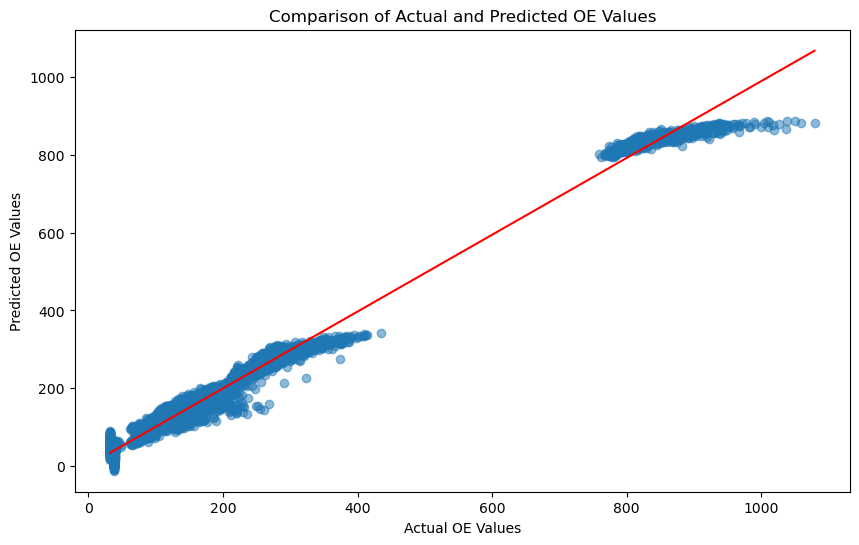

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted values with corrected labels
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual OE Values')
plt.ylabel('Predicted OE Values')
plt.title('Comparison of Actual and Predicted OE Values')

# Plotting a reference line for perfect predictions
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red') # Line of best fit

plt.show()


In [9]:
#build baseline model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

X = full_df.drop('OE', axis=1)
y = full_df['OE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing for numerical and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse_with_preprocessing=mean_squared_error(y_test, y_pred, squared=False)
r2_with_preprocessing=r2_score(y_test, y_pred)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R^2:", r2_score(y_test, y_pred))


RMSE: 19.346649784141544
R^2: 0.9921323167994668


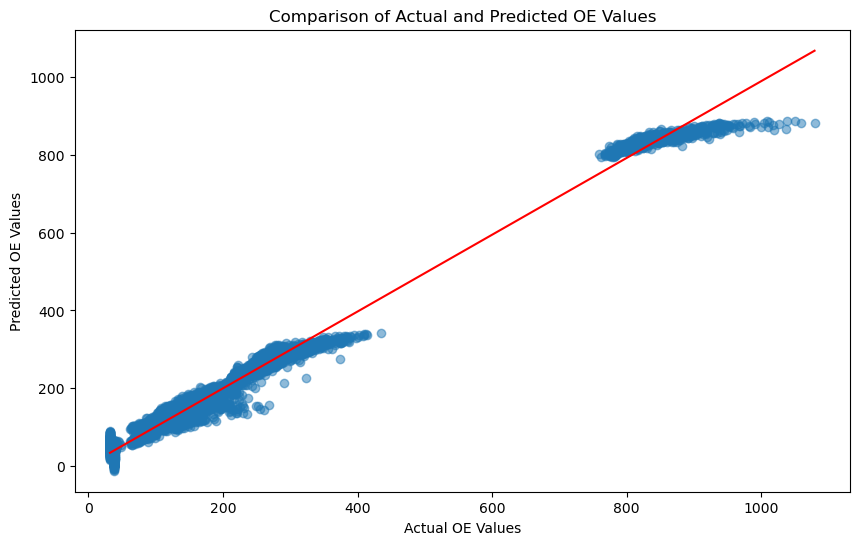

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted values with corrected labels
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual OE Values')
plt.ylabel('Predicted OE Values')
plt.title('Comparison of Actual and Predicted OE Values')

# Plotting a reference line for perfect predictions
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red') # Line of best fit

plt.show()


In [11]:
# Display results in a table
results_df = pd.DataFrame({
    'Model': ['Baseline', 'With Preprocessing'],
    'RMSE': [rmse_baseline, rmse_with_preprocessing],
    'R-squared': [r2_baseline, r2_with_preprocessing]
})
print(results_df)

                Model       RMSE  R-squared
0            Baseline  19.335766   0.992141
1  With Preprocessing  19.346650   0.992132


PCA model

In [13]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std =pd.DataFrame(X_train_std, columns=X_train.columns, index=X_train.index)

X_test_std = scaler.transform(X_test)

In [14]:
X_train_std.describe()

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
count,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,...,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04,2.437500e+04
mean,5.101332e-17,-2.063853e-16,-4.562049e-17,-5.806774e-16,-3.646724e-16,-1.827735e-16,4.547474e-17,3.060799e-17,-3.839117e-16,-2.436979e-16,...,6.413104e-17,-4.110216e-17,-5.363687e-17,-2.288312e-17,1.049417e-17,-2.157135e-17,-6.019572e-17,8.453637e-17,-1.136868e-17,3.731260e-17
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-1.717316e+00,-1.622734e+00,-3.925169e-01,-1.344386e+00,-1.987742e+00,-1.570017e+00,-1.572284e+00,-1.574240e+00,-1.572074e+00,-1.462160e+00,...,-3.337510e-01,-3.403175e-01,-3.349644e-01,-3.340546e-01,-3.216993e-01,-3.298657e-01,-7.061279e-01,-5.323863e-01,-5.317515e-01,-5.403765e-01
25%,-8.644403e-01,-6.033622e-01,-3.925169e-01,-8.023580e-01,-5.962537e-01,-8.534717e-01,-8.551529e-01,-8.568104e-01,-8.553551e-01,-1.173751e+00,...,-3.337510e-01,-3.403175e-01,-3.349644e-01,-3.340546e-01,-3.216993e-01,-3.298657e-01,-7.061279e-01,-5.323863e-01,-5.317515e-01,-5.403765e-01
50%,-1.981444e-03,-1.208595e-01,-3.925169e-01,-2.603296e-01,3.051152e-01,-1.369268e-01,-1.380220e-01,-1.393808e-01,-1.386361e-01,7.009080e-01,...,-3.337510e-01,-3.403175e-01,-3.349644e-01,-3.340546e-01,-3.216993e-01,-3.298657e-01,-7.061279e-01,-5.323863e-01,-5.317515e-01,-5.403765e-01
75%,8.700603e-01,8.101668e-01,-3.925169e-01,4.172060e-01,6.994642e-01,1.145311e+00,1.145265e+00,1.144441e+00,1.143914e+00,9.893170e-01,...,-3.337510e-01,-3.403175e-01,-3.349644e-01,-3.340546e-01,-3.216993e-01,-3.298657e-01,1.416174e+00,-5.323863e-01,-5.317515e-01,-5.403765e-01
max,1.732519e+00,2.128555e+00,4.252508e+00,2.800899e+00,1.392392e+00,1.447015e+00,1.447215e+00,1.446516e+00,1.445690e+00,9.893170e-01,...,2.996245e+00,2.938433e+00,2.985392e+00,2.993522e+00,3.108493e+00,3.031537e+00,1.416174e+00,1.878335e+00,1.880578e+00,1.850562e+00


In [15]:
#no extreme high correlation
# Re-compute the correlation matrix for the predictor variables in the training data
corr_matrix = X_train_std.corr()

# Identify pairs of distinct predictor variables with correlation > 0.99 or < -0.99
high_corr = {}
# Identify the indices where the correlation is greater than 0.99 or less than -0.99
itemindex = np.where((corr_matrix > 0.99) | (corr_matrix < -0.99))

# Extract the pairs of column names and their corresponding correlation values using the identified indices
col_names = X_train.columns
high_corr = {(col_names[i], col_names[j]): corr_matrix.iloc[i, j] for (i, j) in zip(itemindex[0], itemindex[1]) if i > j}

high_corr

print("The following pairs of predictor variables have correlation greater than 0.99 or less than -0.99:")
display(high_corr)


The following pairs of predictor variables have correlation greater than 0.99 or less than -0.99:


{}

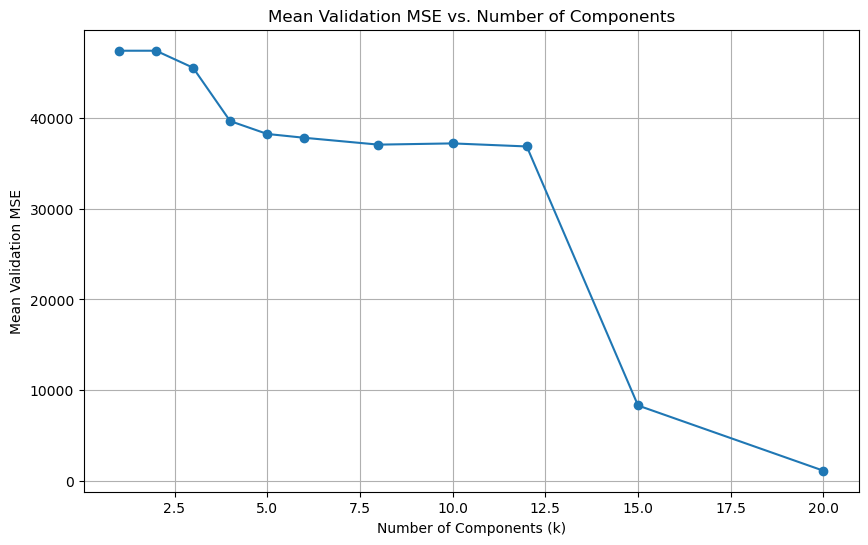

The best k is 20.


In [16]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, mean_squared_error

# Define the set of k values
k_values = [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20]
mean_mse_values = []

# For each k, fit PCA and perform 10-fold cross validation for a linear regression model
for k in k_values:
    # Fit and transform using PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_std)
    
    # Perform 10-fold cross validation
    scores = cross_validate(LinearRegression(), X_train_pca, y_train, cv=10, 
                            scoring=make_scorer(mean_squared_error, greater_is_better=False))
    
    mean_mse_values.append(-scores['test_score'].mean())

# Plot the mean validation MSE for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Components (k)')
plt.ylabel('Mean Validation MSE')
plt.title('Mean Validation MSE vs. Number of Components')
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(mean_mse_values)]
print(f"The best k is {best_k}.")

PCR train R^2: 0.9762
PCR test R^2: 0.9756


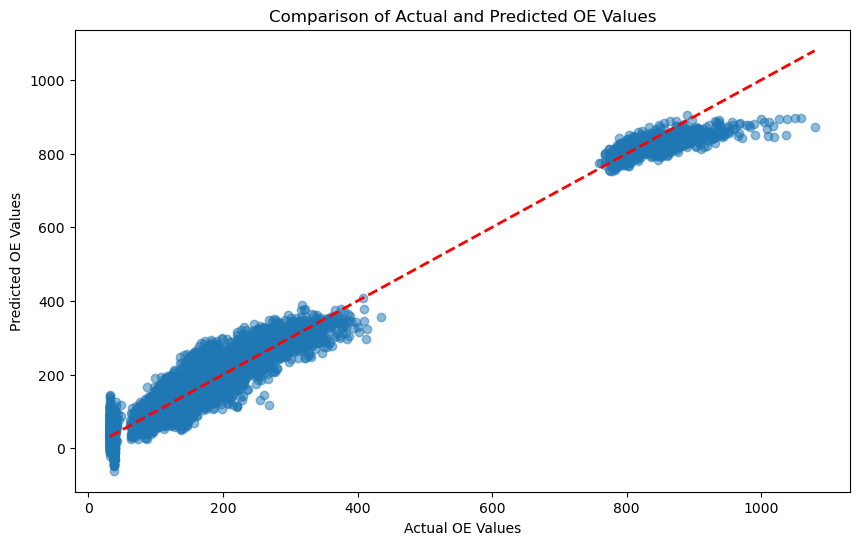

In [19]:
# Fit the PCA transformation on the standardized X_train with n_components equal to the best k
pca_best = PCA(n_components=best_k)
X_train_pca_best = pca_best.fit_transform(X_train_std)
X_test_pca_best = pca_best.transform(X_test_std)

# Fit a linear regression model to the PCA-transformed components
linreg_pcr = LinearRegression()
linreg_pcr.fit(X_train_pca_best, y_train)

# Predict OE values on the PCA-transformed test data
y_pred = linreg_pcr.predict(X_test_pca_best)

pcr_train_r2 = linreg_pcr.score(X_train_pca_best, y_train)
pcr_test_r2 = linreg_pcr.score(X_test_pca_best, y_test)
print(f"PCR train R^2: {pcr_train_r2:.4f}")
print(f"PCR test R^2: {pcr_test_r2:.4f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual OE Values')
plt.ylabel('Predicted OE Values')
plt.title('Comparison of Actual and Predicted OE Values')

# Plotting a reference line for perfect predictions (y=x)
plt.plot(np.unique(y_test), np.unique(y_test), color='red', linestyle='--', linewidth=2)

plt.show()

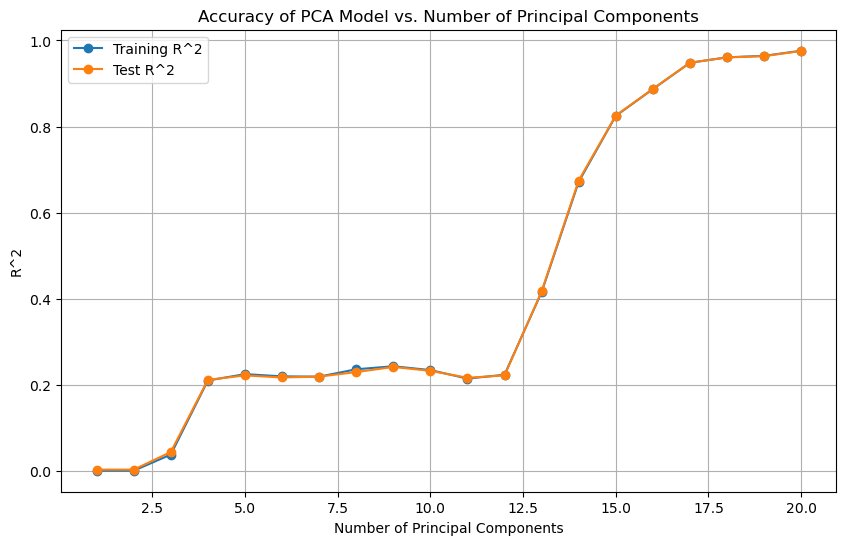

In [20]:
import matplotlib.pyplot as plt


n_components_range = range(1, best_k + 1)

# Initialize lists to store R^2 values
train_r2_values = []
test_r2_values = []

# Loop through different numbers of components and calculate R^2 for each
for n_components in n_components_range:
    # Fit PCA transformation
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    # Fit linear regression model to PCA-transformed data
    linreg_pcr = LinearRegression()
    linreg_pcr.fit(X_train_pca, y_train)
    
    # Calculate R^2 for training set
    train_r2 = linreg_pcr.score(X_train_pca, y_train)
    
    # Calculate R^2 for test set
    test_r2 = linreg_pcr.score(X_test_pca, y_test)
    
    # Append R^2 values to the lists
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, train_r2_values, marker='o', linestyle='-', label='Training R^2')
plt.plot(n_components_range, test_r2_values, marker='o', linestyle='-', label='Test R^2')
plt.xlabel('Number of Principal Components')
plt.ylabel('R^2')
plt.title('Accuracy of PCA Model vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()




In [21]:
# Display your results
pd.DataFrame([
    {'model': f'linear',
    'train $R^2$': r2_baseline},
    {'model': f'PCR (k={best_k})',
     'train $R^2$': pcr_train_r2},
]).set_index('model')

,train $R^2$
model,
linear,0.992141
PCR (k=20),0.976199


In [22]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train)
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_standardized)
X_transformed[:5]

array([[-1.10620771,  1.98249826],
       [-3.5260112 , -1.87532016],
       [ 3.55978389,  0.14470497],
       [ 1.36582356,  1.89435475],
       [ 1.42485385, -2.68284245]])

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = full_df.drop(columns=['OE'])
y = full_df['OE']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error and R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Mean Squared Error: 164.86
R^2 Score: 1.00


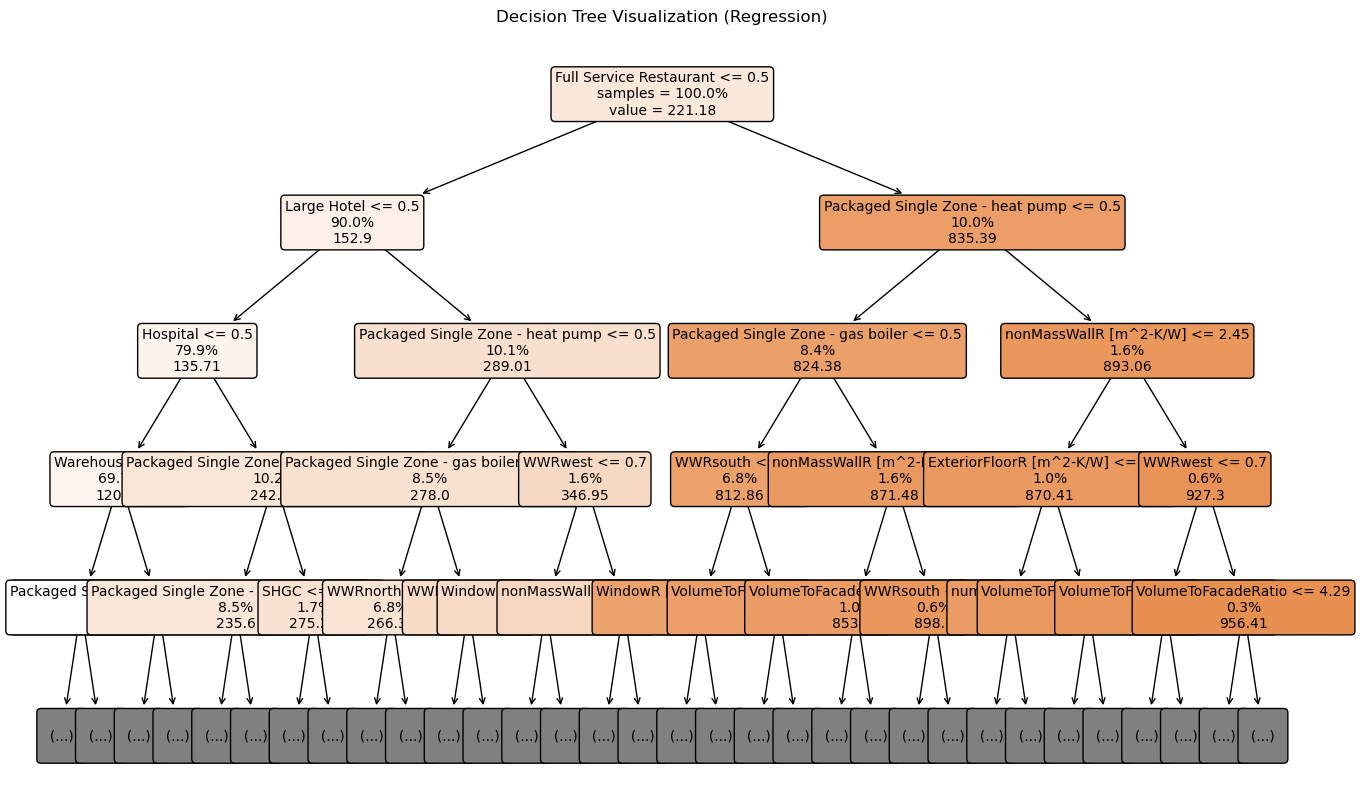

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Convert the index of X to a list of strings for feature_names
feature_names = X.columns.tolist()

# Set parameters for improved readability
plt.figure(figsize=(16, 10))  # Adjust the figure size
plot_tree(
    dt_model,
    filled=True,
    feature_names=feature_names,
    fontsize=10,  # Adjust font size for text
    max_depth=4,  # Limit the tree depth for better visualization
    precision=2,  # Limit decimal precision for values
    label="root",  # Set the label for the root node
    proportion=True,  # Show proportions in leaf nodes
    impurity=False,  # Do not show impurity
    rounded=True,  # Use rounded boxes for nodes
)
plt.title("Decision Tree Visualization (Regression)")
plt.show()
